#                                            NYC Taxi Data Analysis

Project Choice – I  have selected the project area – “exploring NYC Taxi Trips”. I would use the following datasets –
Yellow/Green Taxi Data
Tasks to be carried out –
•	Analyzing the taxi data to find statistical models, like Regions with large number of drop offs at morning peak hours to find work areas.
•	Find out how trip duration varies with distance.
•	How ridership varies by time of the day.
•	How ridership varies by day of the week.
•	Visualizing pickups and dropoffs on the NYC map.
I wanted to explore the NYC taxi data but the data is humungous(upwards of 300gb) and I didn’t think I had enough computation power to explore all of it and so I went online looking for sources which have either already reduced the data diced/sliced the important variables and luckily I found some data which belongs to the 2013 year. 
There are of course plenty of ways to get the data into shape. There are two sets of files - one for trip data and one for fare data. This site has them broken down into 12 files for each set.
Using a python library I have merged the individual files for easier analysis and removed the unwanted columns like vendor_id and the various surcharges. 
And then merged the 2 files on a common column using the medaillion id. 


In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import os
import sys
import time
import requests
import datetime


In [10]:
import glob
import csv

# Change delimiter to the appropriate one in CSV
delimiter = '/'
csvs = glob.glob('*.csv')
f = open('merged_data.csv', 'w')
master_csv = csv.writer(f)
#Take the header of the first CSV and make it the master header
first_csv = open(csvs[0], 'r')
headers = first_csv.readline().strip().split(delimiter)
master_csv.writerow(headers)
# Write remaining rows
for line in first_csv:
    master_csv.writerow(line.strip().split(delimiter))
# Read remaining CSVs and skip the first row
for file in csvs[1:]:
    current_csv = open(file, 'r')
    for line_num, line in enumerate(current_csv):
        if line_num > 0:
            master_csv.writerow(line.strip().split(delimiter))           
f.close()

# This takes the 12 files and merges them. 

IndexError: list index out of range

In [46]:
 tripData = pd.read_csv("C:/Users/Dell/Desktop/nycTaxi/trip/trip_data_1.csv", nrows=10000)
 fareData = pd.read_csv("C:/Users/Dell/Desktop/nycTaxi/fare/trip_fare_1.csv", nrows=10000)

merge1 = pd.merge(tripData, fareData, on = 'medallion', how='inner')
fareTripMerge = merge1.to_csv('C:/Users/Dell/Desktop/nycTaxi/fare/merged.csv')

# Merging fare & trip data

In [58]:
fareTripMerge = pd.read_csv('C:/Users/Dell/Desktop/nycTaxi/fare/merged.csv', nrows=100000)
fareTripMerge.head()
fareTripMerge.isnull().sum()



Unnamed: 0                0
medallion                 0
hack_license              0
vendor_id                 0
rate_code                 0
store_and_fwd_flag    31221
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
trip_time_in_secs         0
trip_distance             0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
 hack_license             0
 vendor_id                0
 pickup_datetime          0
 payment_type             0
 fare_amount              0
 surcharge                0
 mta_tax                  0
 tip_amount               0
 tolls_amount             0
 total_amount             0
dtype: int64

In [9]:
tripData = pd.read_csv("C:/Users/Dell/Desktop/nycTaxi/trip/trip_data_1.csv", nrows=1000000)
tripData.head()
tripData.isnull().sum()

# This checks for null values in our data. And since none of the columns we use have any null data we should be fine.

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    996465
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
dtype: int64

In [37]:
tripData["passenger_count"].describe()

count    1000000.000000
mean           2.129268
std            1.724241
min            0.000000
25%            1.000000
50%            1.000000
75%            3.000000
max            6.000000
Name: passenger_count, dtype: float64

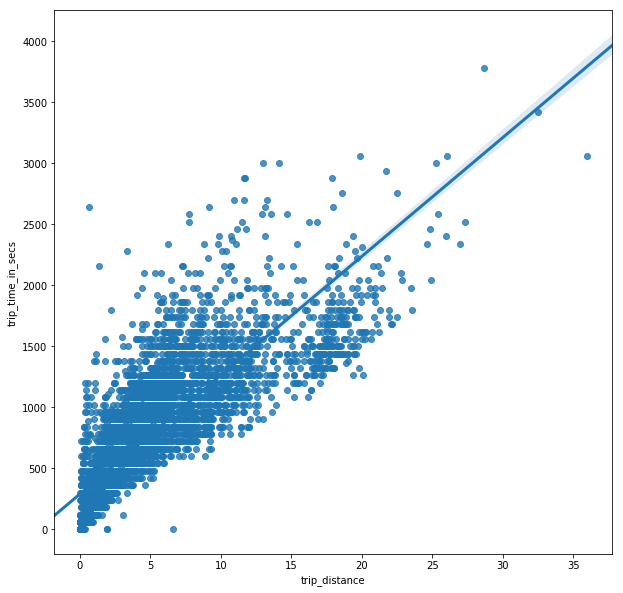

In [62]:
plt.figure(figsize=(10,10))
sb.regplot(x="trip_distance", y="trip_time_in_secs", data=tripData)

# From the plot below there are very few outliers in terms of trip distance and in terms of trip time as well.

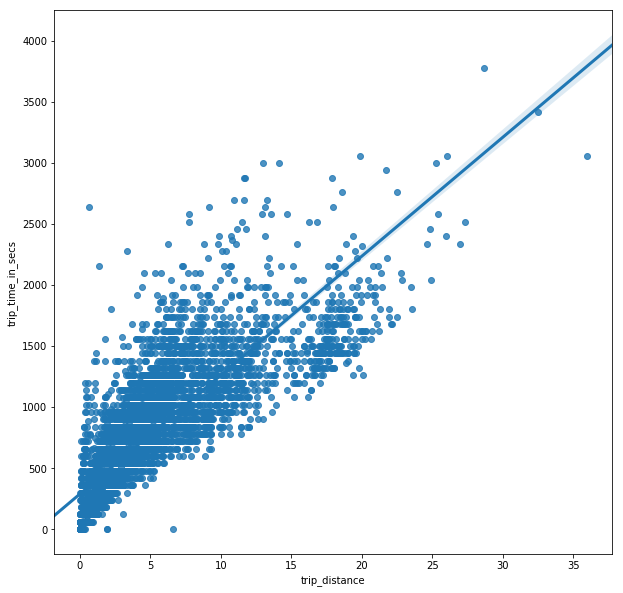

In [63]:
plt.figure(figsize=(10,10))
sb.regplot(x="trip_distance", y="trip_time_in_secs", data=tripData)

# Trip duration is plotted against trip distance and apart from the outliers we see a clear correlation between 
# trip duration and trip time.

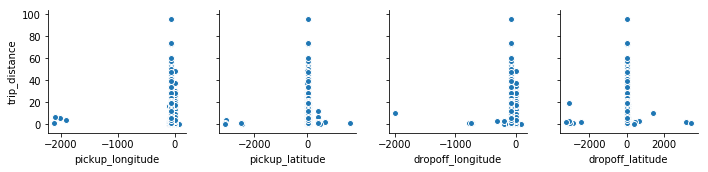

In [40]:
g = sb.pairplot(tripData, 
                 x_vars=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],
                 y_vars=["trip_distance"])


# Those latitude longitude has outliers which are clearly wrong values and have to be cleared for analysis.

In [10]:
tripData["trip_time_in_secs"].describe()
# This gives the summary statistics for the trip duration

count    1000000.000000
mean         691.155787
std          492.380086
min            0.000000
25%          360.000000
50%          540.000000
75%          900.000000
max        10800.000000
Name: trip_time_in_secs, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AB8B65CB70>]],
      dtype=object)

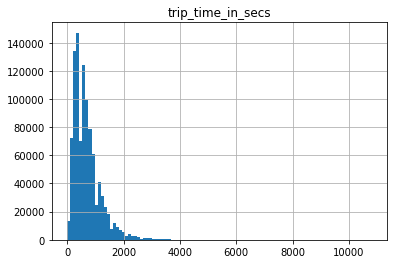

In [15]:
tripData.hist(column='trip_time_in_secs', bins = 100)
# This shows that most trips have short times.

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


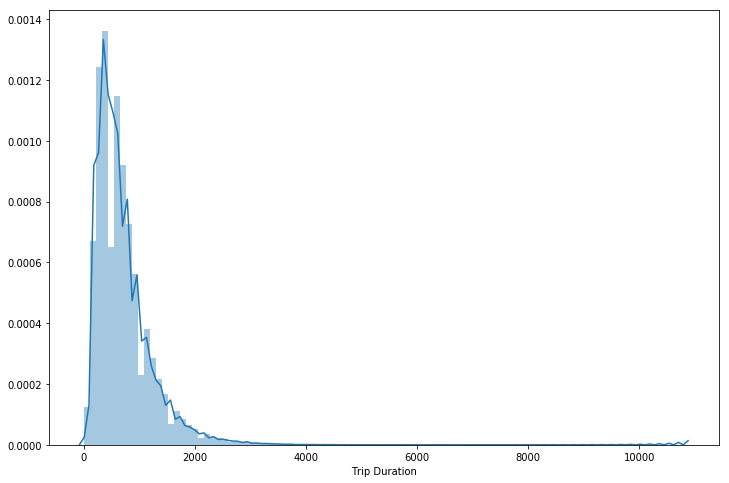

In [24]:
plt.figure(figsize=(12,8))
plt.xlabel('Trip Duration')
sb.distplot(tripData.trip_time_in_secs.values, bins=100)
plt.show()

# This plot shows most of the trips having an avergae time of less than 1000 seconds.

C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


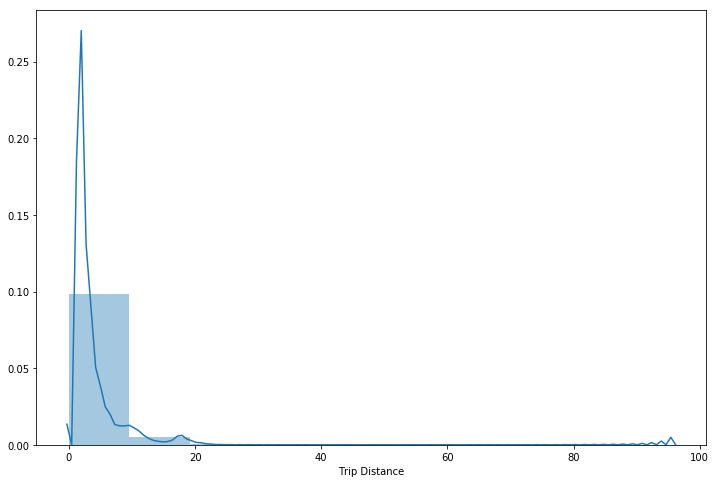

In [26]:
plt.figure(figsize=(12,8))
plt.xlabel('Trip Distance')
sb.distplot(tripData.trip_distance.values, bins=10)
plt.show()

In [70]:
# #String to Datetime conversion
tripData["pickup_datetime"] = pd.to_datetime(tripData["pickup_datetime"])
tripData["dropoff_datetime"] = pd.to_datetime(tripData["dropoff_datetime"])
tripData["pickup_datetime"] = pd.to_datetime(tripData["pickup_datetime"])
tripData["pickup_dayofweek"] = tripData.pickup_datetime.dt.dayofweek
tripData["pickup_weekday_name"] = tripData.pickup_datetime.dt.weekday_name
tripData["pickup_hour"] = tripData.pickup_datetime.dt.hour
tripData["pickup_month"] = tripData.pickup_datetime.dt.month

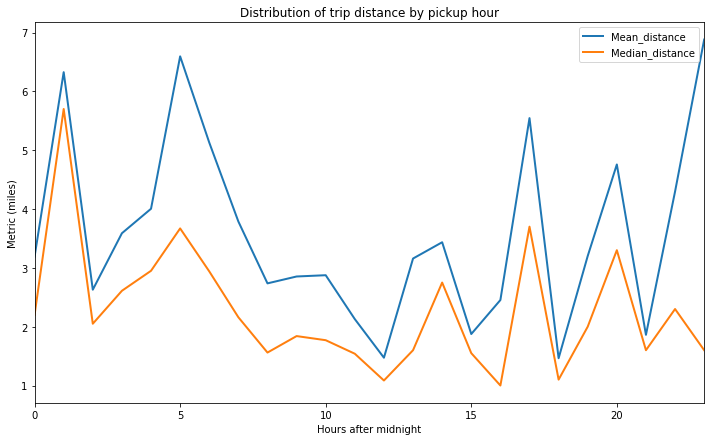

In [72]:
# Q: does time of the day affect the taxi ridership?

fix, axis = plt.subplots(1,1,figsize=(12,7))
tab = tripData.pivot_table(index='pickup_hour', values='trip_distance', aggfunc=('mean','median')).reset_index()
tab.columns = ['Hour','Mean_distance','Median_distance']
tab[['Mean_distance','Median_distance']].plot(ax=axis)
plt.ylabel('Metric (miles)')
plt.xlabel('Hours after midnight')
plt.title('Distribution of trip distance by pickup hour')
plt.xlim([0,23])
plt.show()

# This shows trip distance by pickup hour and we see morning and evening hours having the highest distances.

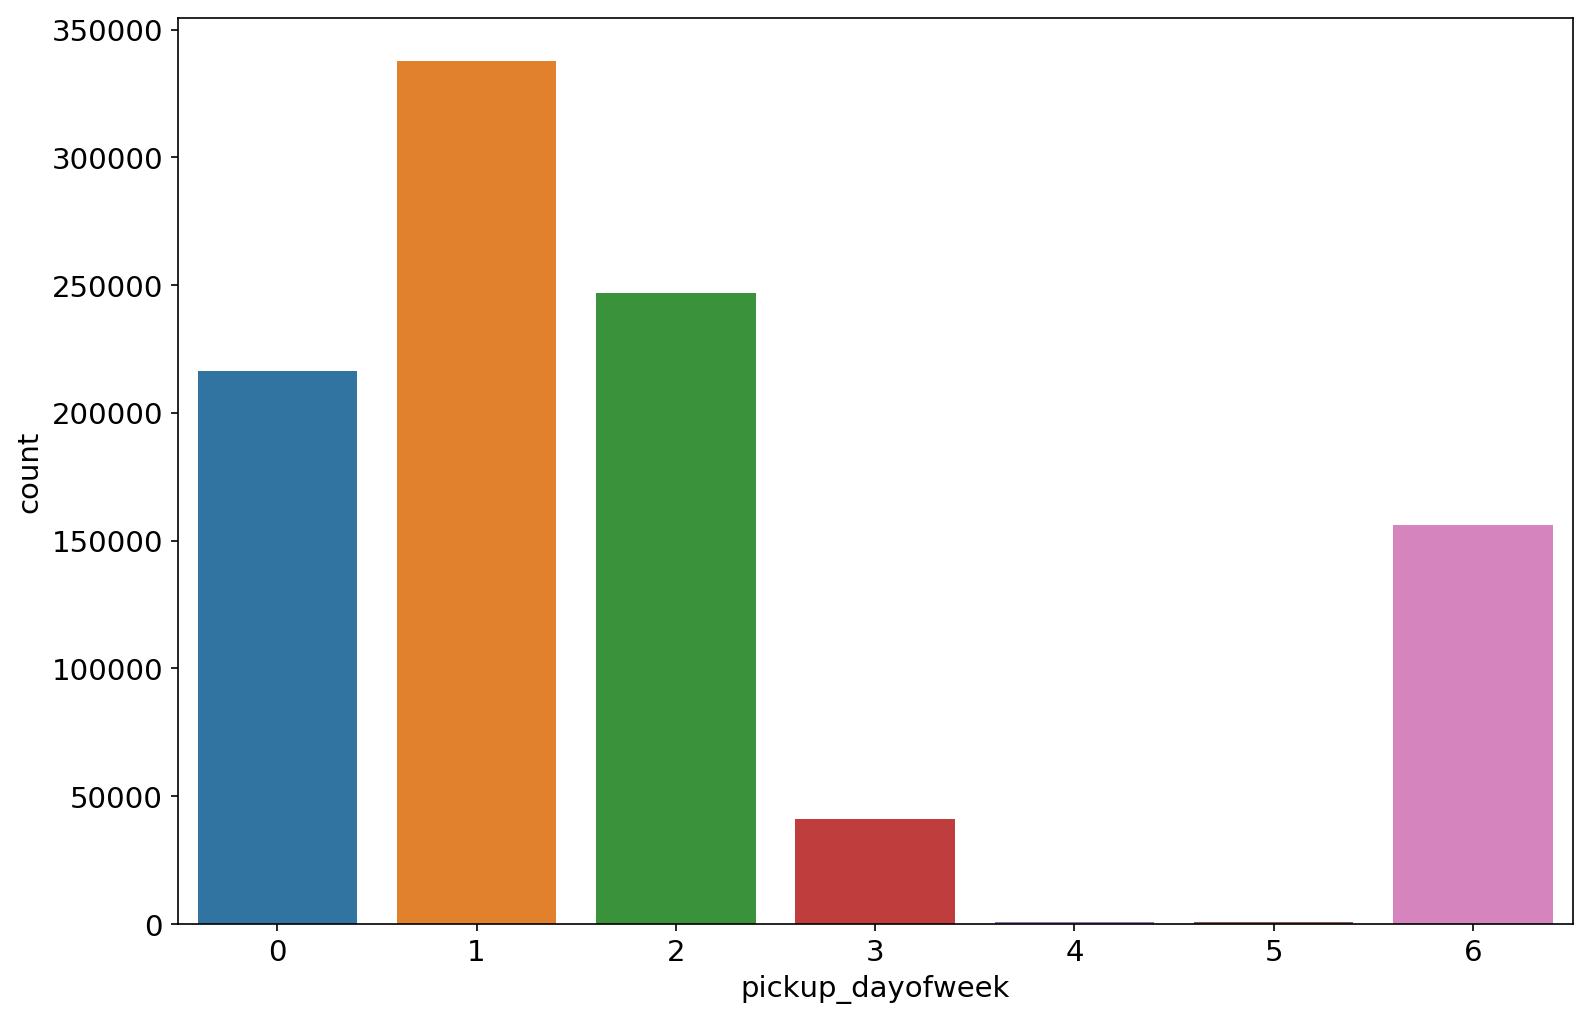

In [150]:
plt.figure(figsize=(12,8))
sb.countplot(x="pickup_dayofweek", data=tripData)
plt.show()



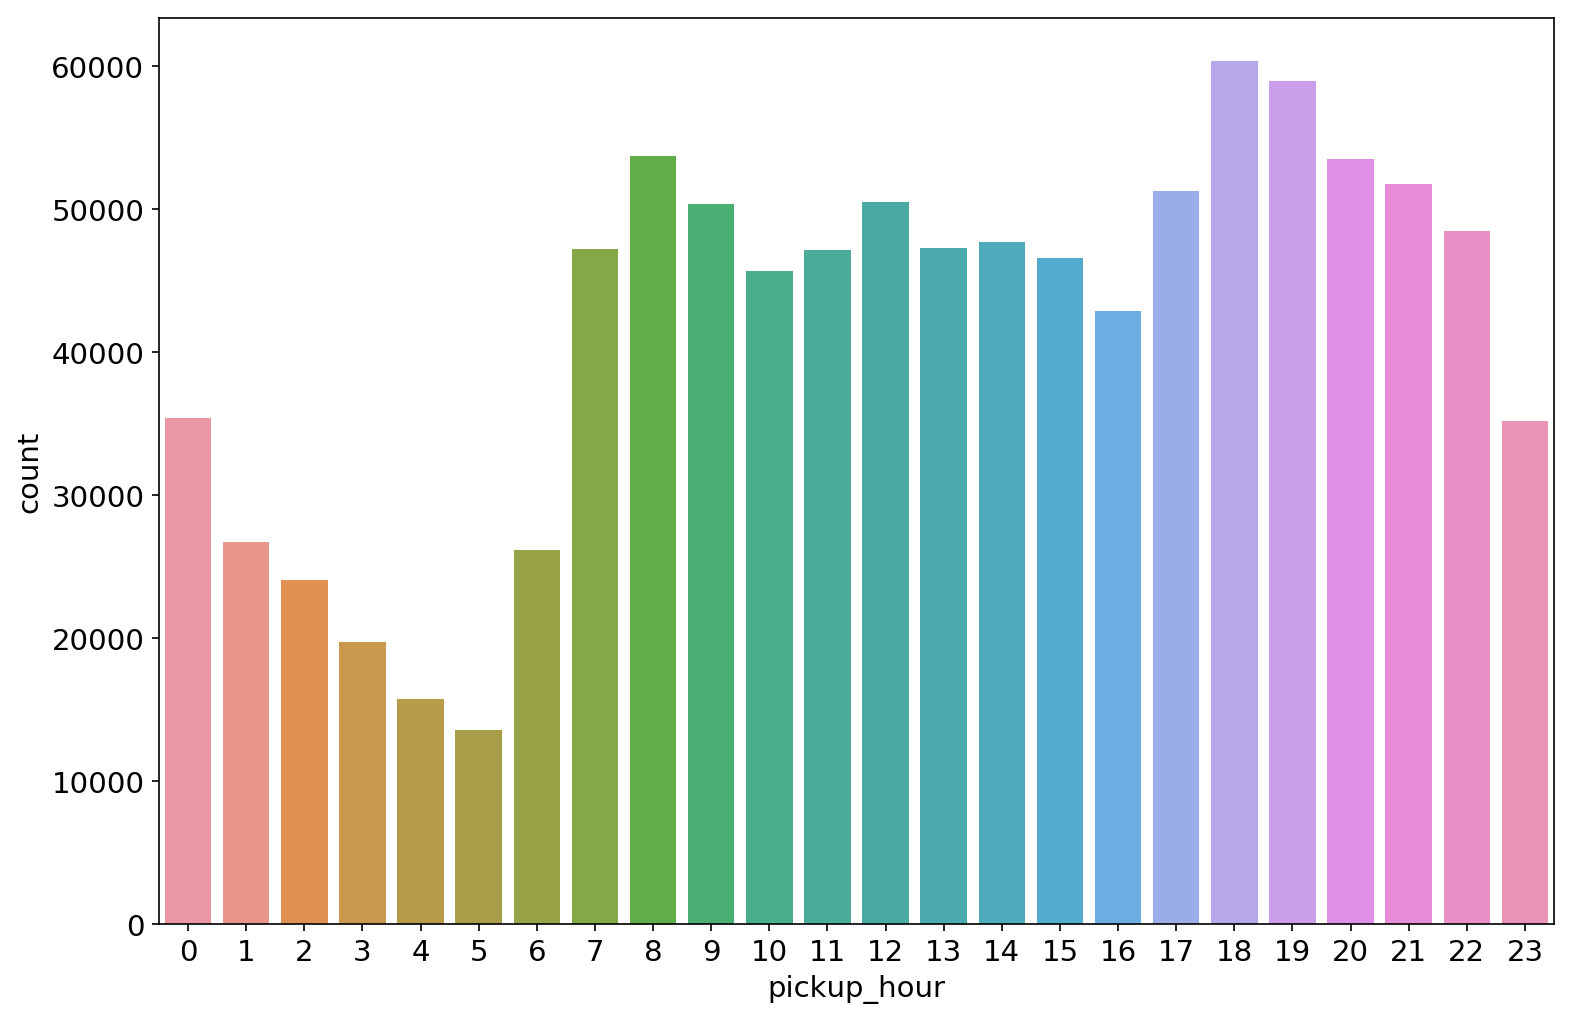

In [149]:
plt.figure(figsize=(12,8))
sb.countplot(x="pickup_hour", data=tripData)
plt.show()


# This shows the number of pickups by time of the day.

In [63]:
(tripData["dropoff_datetime"] - tripData["pickup_datetime"]).describe()

count                      1000
mean     0 days 00:10:43.618000
std      0 days 00:07:34.634255
min             0 days 00:00:00
25%             0 days 00:05:00
50%             0 days 00:09:00
75%             0 days 00:14:00
max             0 days 01:03:00
dtype: object

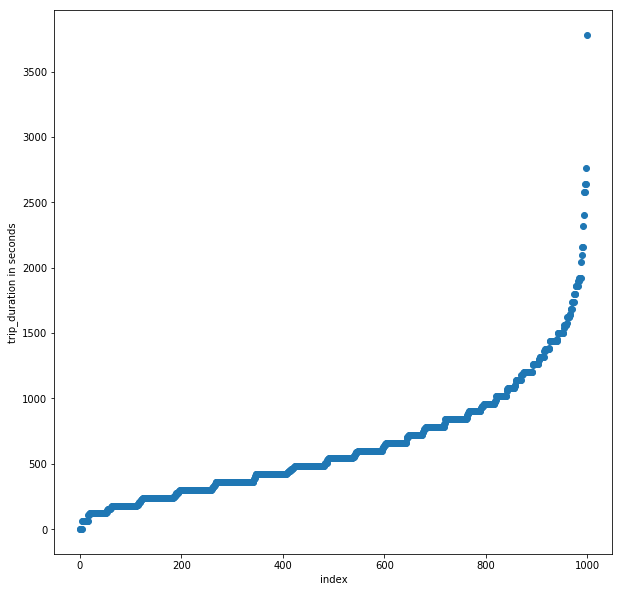

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(tripData["trip_time_in_secs"])), np.sort(tripData["trip_time_in_secs"]))
plt.xlabel('index')
plt.ylabel('trip_duration in seconds')
plt.show()

In [67]:
#Removing the outliers in the dataset
tripData = tripData[tripData["trip_time_in_secs"] < 500000]

In [69]:
from haversine import haversine

def calculate_haversine_distance(var_row):
    return haversine((var_row["pickup_latitude"], var_row["pickup_longitude"]), 
                     (var_row["dropoff_latitude"], var_row["dropoff_longitude"]), miles = True)

#Calculating the Haversine Distance
#The haversine formula determines the great-circle distance between two points on a sphere 
#given their longitudes and latitudes.
tripData["haversine_distance"] = tripData.apply(lambda row: calculate_haversine_distance(row), axis=1)

In [70]:
tripData["haversine_distance"].describe()

count    1000.000000
mean        2.326663
std         2.515960
min         0.000000
25%         0.780945
50%         1.448235
75%         2.918228
max        21.543723
Name: haversine_distance, dtype: float64

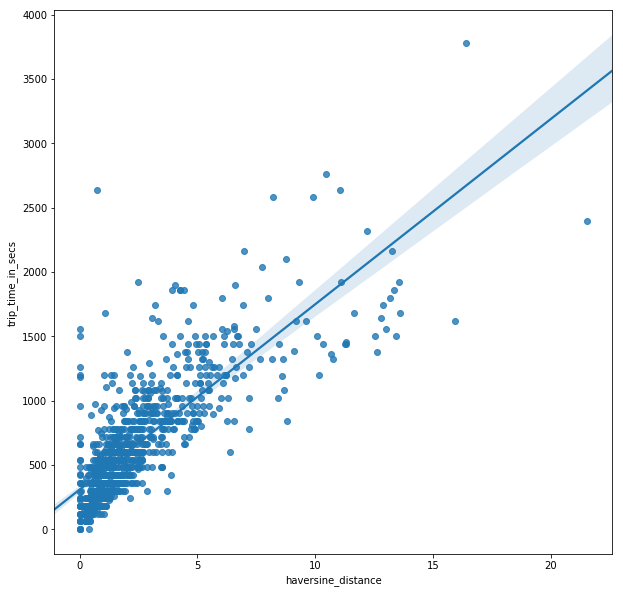

In [71]:
plt.figure(figsize=(10,10))
sb.regplot(x="haversine_distance", y="trip_time_in_secs", data=tripData)

C:\Users\Dell\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Dell\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


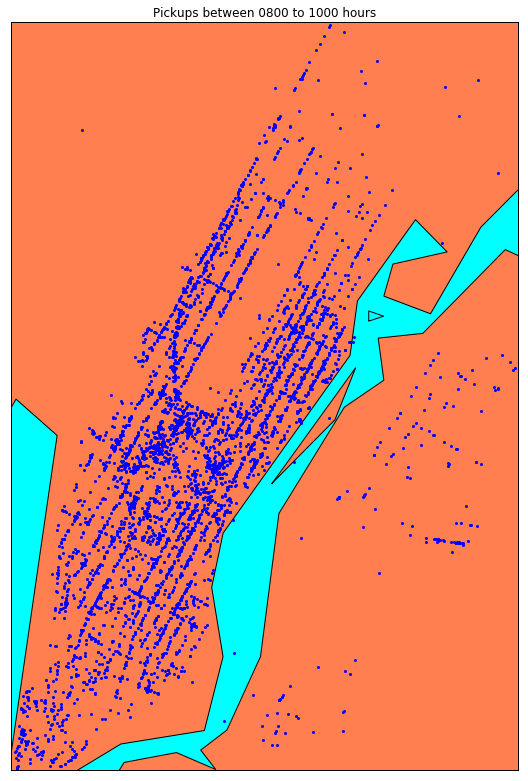

In [34]:
def pickup_dropoff_maps(hour_start, hour_end):
    fig = plt.figure(figsize=(20,20))

    
    map = Basemap(projection='merc', lat_0=40.7128, lon_0=-74.0059,
    resolution = 'h', area_thresh = 0.001,
    lowlon=-74.018629, lowlat=40.704889,
    uplon=-73.905500, uplat=40.831201)

# Pickup map
    ax1 = fig.add_subplot(121)
    ax1.set_title('Pickups between %04d to %04d hours' %(hour_start*100,hour_end*100))

    map.drawcoastlines()
    map.drawcountries()
    map.drawrivers()
    map.fillcontinents(color='coral',lake_color='aqua')
    map.drawmapboundary(fill_color='aqua')

    pickup_df = pd.DataFrame(data=tripData[tripData['pickup_longitude'] != 0][['pickup_datetime','pickup_longitude','pickup_latitude']], 
                  columns=['pickup_datetime','pickup_longitude','pickup_latitude'])
    count = 1

    for index, row in pickup_df.iterrows():
        if count > 5000:
            break
        pickup_time = time.strptime(row['pickup_datetime'], "%Y-%m-%d %H:%M:%S").tm_hour
        if ((pickup_time >= hour_start) and (pickup_time<hour_end)):
            x1,y1 = map(row['pickup_longitude'], row['pickup_latitude'])
            map.plot(x1, y1, 'bo', markersize=2)
            count += 1 
    
    plt.show()
    
draw_pickup_dropoff_maps(8, 10)

C:\Users\Dell\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Dell\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


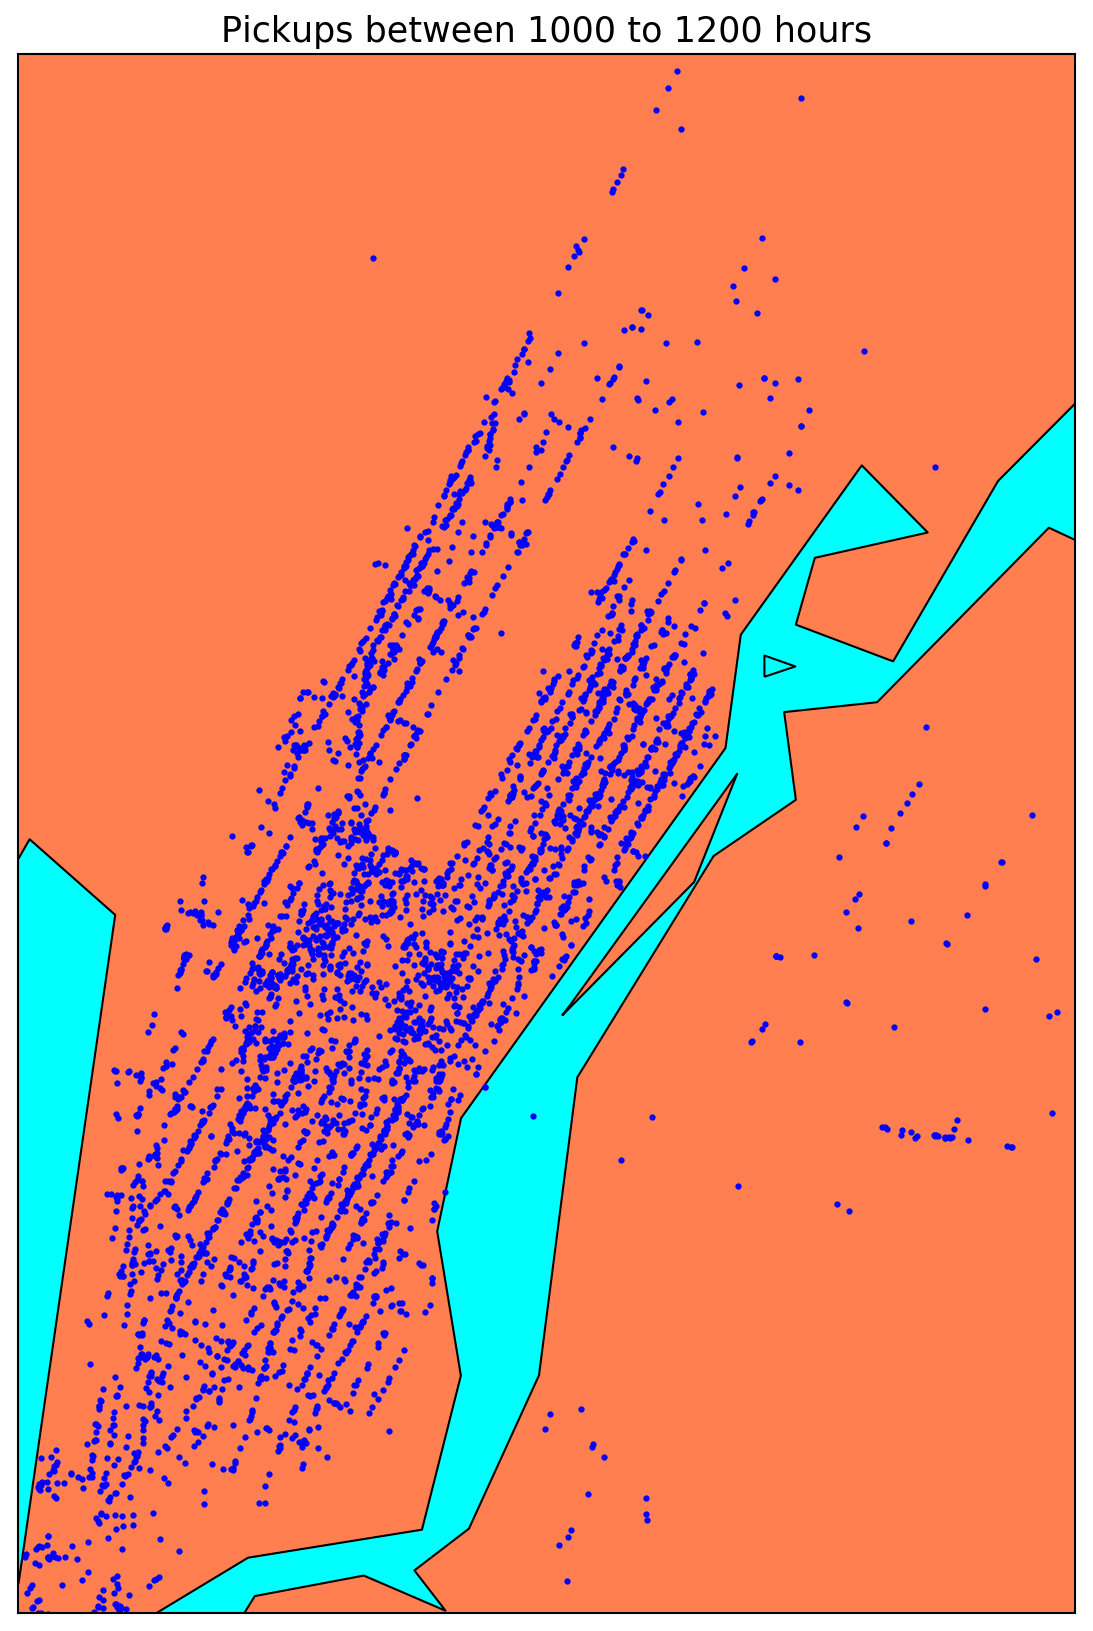

In [126]:
draw_pickup_dropoff_maps(10, 12)